# Basics of Coding

## Variables

oinfofnazoidn

In [121]:
a = 1
b = 2
print(a + b)
print(a * b * b)

3
4


## Lists and indexing

In [120]:
l = [a, b, "CDE", ["F", 42]]
print(l[0])
print(l[-1])
print(l[-1][-1])

1
['F', 42]
42


## Loops and Conditions

In [122]:
e = 100
f = "HEC"
print("Is 'e' equal to 100? Answer: ", e == 100) 
# '==' asks if there is equivalence
print("Is 'f' different from 'HED'? Answer: ", f != "HED")
# '!=' asks for non-equivalence

if e / 10 == 10:
    print("Condition was met")
else:
    print("Nope")
if len(f) >= 4:
    print("Condition was met")
else:
    print("Nope")

Is 'e' equal to 100? Answer:  True
Is 'f' different from 'HED'? Answer:  True
Condition was met
Nope


In [30]:
newlist = range(6) # The function range() returns a list of numbers up to 6
for x in newlist:
    print("The number now is,", x, "and its square is :", x * x)

The number now is, 0 and its square is : 0
The number now is, 1 and its square is : 1
The number now is, 2 and its square is : 4
The number now is, 3 and its square is : 9
The number now is, 4 and its square is : 16
The number now is, 5 and its square is : 25


In [31]:
origin = "Perlinpinpin"
reconstruct = "" # an empty string
for x in origin:
    print("We add the letter", x, "to the word", reconstruct)
    reconstruct = reconstruct + x
print("When the loop has finished:", reconstruct)

We add the letter P to the word 
We add the letter e to the word P
We add the letter r to the word Pe
We add the letter l to the word Per
We add the letter i to the word Perl
We add the letter n to the word Perli
We add the letter p to the word Perlin
We add the letter i to the word Perlinp
We add the letter n to the word Perlinpi
We add the letter p to the word Perlinpin
We add the letter i to the word Perlinpinp
We add the letter n to the word Perlinpinpi
When the loop has finished: Perlinpinpin


## Load the Data

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
from kmodes.kprototypes import KPrototypes

df = pd.read_csv("Cus.csv", header="infer", encoding="utf8")
df.describe()

,Age,Work_Experience,Family_Size
count,2627.000000,2358.000000,2514.000000
mean,43.649791,2.552587,2.825378
std,16.967015,3.341094,1.551906
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

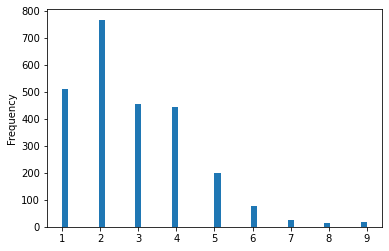

In [126]:
numerical = ['Age', 'Work_Experience', 'Family_Size']
df["Family_Size"].plot(kind='hist', subplots=True, bins=50)

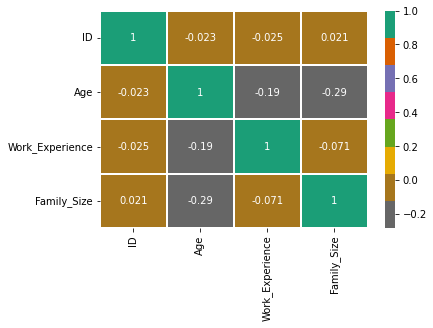

In [4]:
plt.figure(figsize=(6,4)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

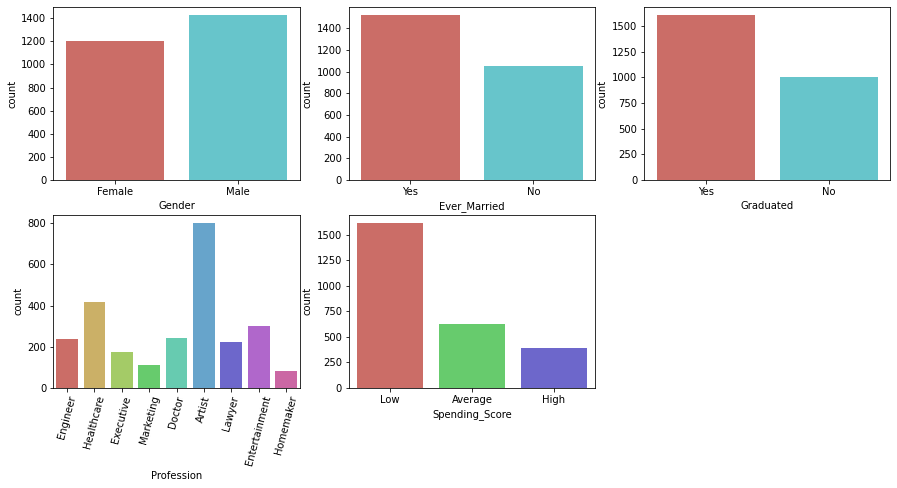

In [127]:
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
sns.countplot(x='Gender', data = df, palette='hls')
plt.subplot(2,3,2)
sns.countplot(x='Ever_Married', data = df, palette='hls')
plt.subplot(2,3,3)
sns.countplot(x='Graduated', data = df, palette='hls')
plt.subplot(2,3,4)
sns.countplot(x='Profession', data = df, palette='hls')
plt.xticks(rotation = 75)
plt.subplot(2,3,5)
sns.countplot(x='Spending_Score', data = df, palette='hls')

# Machine Learning Application


In [103]:
data = df.copy()

data['Ever_Married'] = data['Ever_Married'].fillna(data['Ever_Married'].mode()[0])
data['Graduated'] = data['Graduated'].fillna(data['Graduated'].mode()[0])
data['Profession'] = data['Profession'].fillna(data['Profession'].mode()[0])
data['Work_Experience'] = data['Work_Experience'].fillna(data['Work_Experience'].median())
data['Family_Size'] = data['Family_Size'].fillna(data["Family_Size"].median()) 

Columnspos= [data.columns.get_loc(col) for col in list(data.select_dtypes("object").columns)]
columns_to_normalize = ['Work_Experience','Family_Size','Age']
data[columns_to_normalize] = data[columns_to_normalize].apply(lambda x: (x - x.mean()) / np.std(x))

In [104]:
data_matrix = data.to_numpy()
model = KPrototypes(n_jobs = -1, n_clusters=3, init="Huang", random_state=42)
model.fit_predict(data_matrix, categorical= Columnspos)
data["Cluster labels"]= model.labels_
data["Segment"]= data["Cluster labels"].map({0:"First", 1:"Second", 2:"Third"})
# Order the clusters
data["Segment"] = data["Segment"].astype("category")
data["Segment"] = data["Segment"].cat.reorder_categories(["First","Second","Third"])


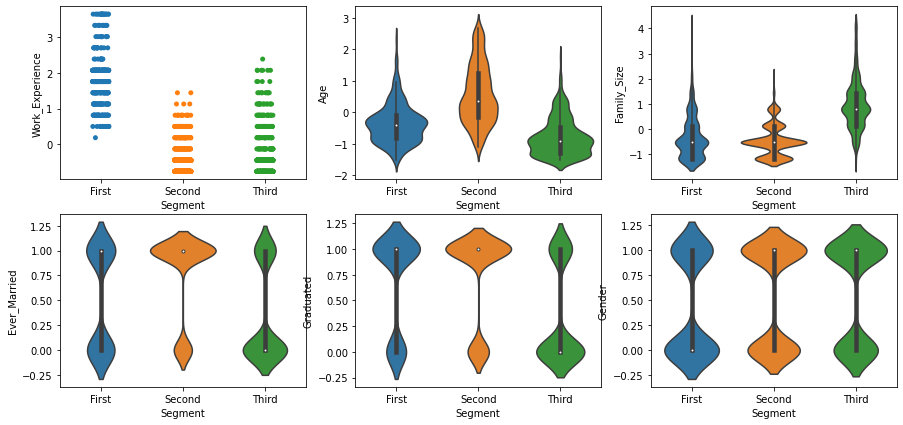

In [105]:
plt.figure(figsize=(15,7))
plt.subplot(231)
sns.stripplot(data=data, x="Segment", y="Work_Experience")
plt.subplot(232)
sns.violinplot(data=data, x="Segment", y="Age")
plt.subplot(233)
sns.violinplot(data=data, x="Segment", y="Family_Size")
dd = {"Yes": 1, "No": 0, "Male": 1, "Female": 0}
for e, nonnum in enumerate(["Ever_Married", "Graduated", "Gender"]):
    data = data.replace({nonnum: dd})
    plt.subplot(2,3,e +4)
    sns.violinplot(data=data, x="Segment", y=nonnum)

Text(0, 0.5, 'Family_size')

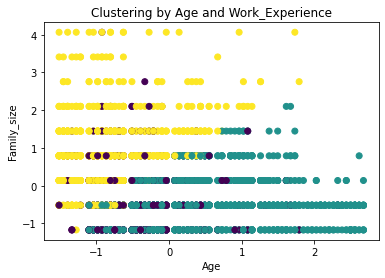

In [115]:
plt.scatter(data["Age"], data["Family_Size"], c=data["Cluster labels"])
plt.title('Clustering by Age and Work_Experience')
plt.xlabel('Age')
plt.ylabel('Family_size')

## Example 2 - Churn

In [106]:
df = pd.read_csv("TelCo.csv", header="infer", encoding="utf8")

In [ ]:
df

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

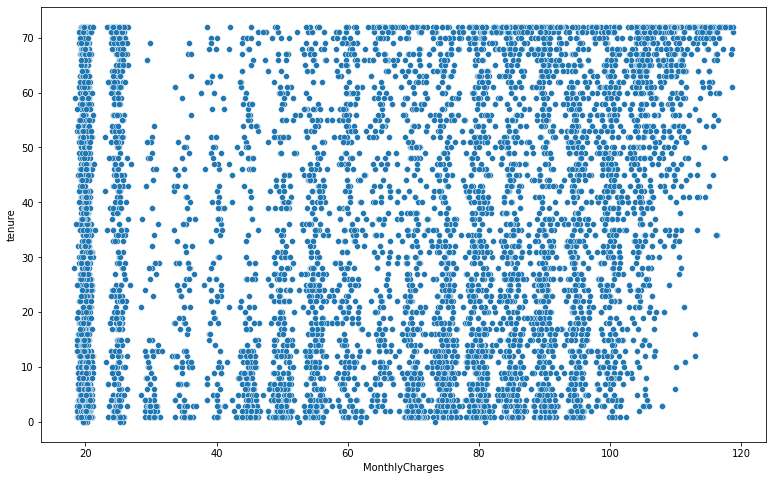

In [118]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(x='MonthlyCharges',y="tenure", data = df, palette='hls')

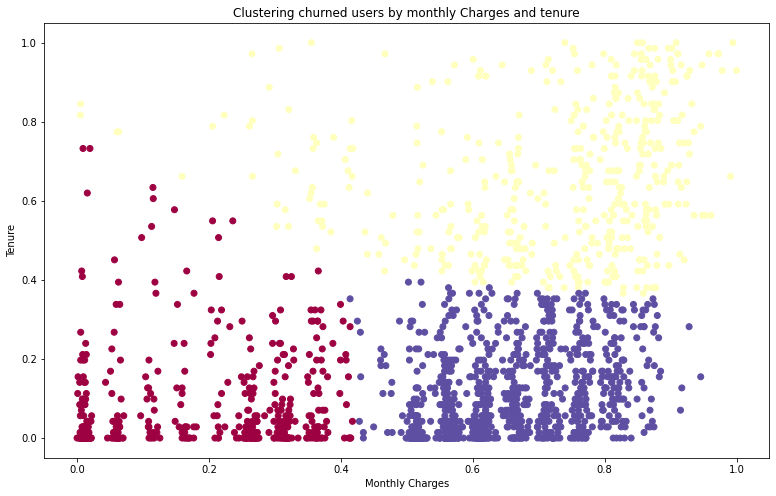

In [71]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

monthlyp_and_tenure = df[['MonthlyCharges','tenure']][df.Churn == 'Yes']

scaler = MinMaxScaler()
monthly_and_tenure_standardized = pd.DataFrame( scaler.fit_transform(monthlyp_and_tenure) )
monthly_and_tenure_standardized.columns = ['MonthlyCharges','tenure']

kmeans = KMeans(n_clusters = 3, random_state = 42).fit(monthly_and_tenure_standardized)

monthly_and_tenure_standardized['cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(13,8))
plt.scatter( monthly_and_tenure_standardized['MonthlyCharges'], monthly_and_tenure_standardized['tenure'],
           c = monthly_and_tenure_standardized['cluster'], cmap = 'Spectral')

plt.title('Clustering churned users by monthly Charges and tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')


plt.show()

Three groups of churned users: those who paid little and left quickly; those who paid a lot and left quickly; and those who stayed long and paid a lot.

In [107]:
import hdbscan
tsne2 = np.asfarray(monthly_and_tenure_standardized)
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=2, metric="euclidean", prediction_data=False, cluster_selection_method="eom")
#  clusterer2 = hdbscan.HDBSCAN(metric='precomputed').fit(dist)
clusterer.fit(tsne2)

HDBSCAN(min_cluster_size=10, min_samples=2)

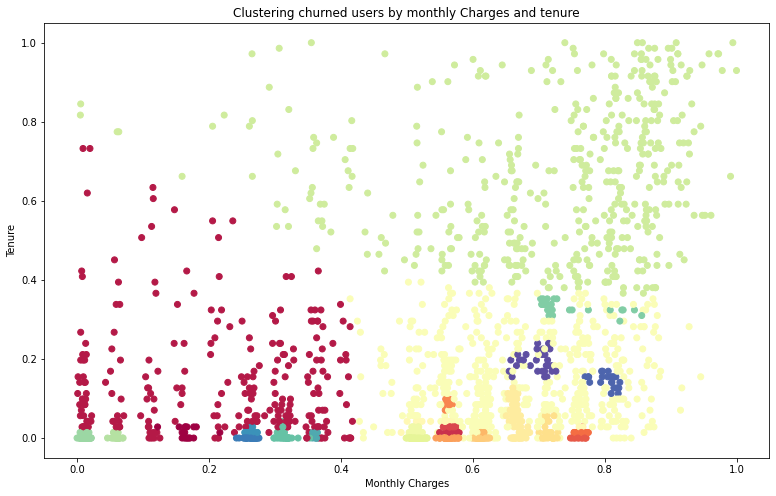

In [108]:
clusters = clusterer.labels_.tolist()
monthly_and_tenure_standardized['clusters'] = clusters

fig, ax = plt.subplots(figsize=(13,8))
plt.scatter( monthly_and_tenure_standardized['MonthlyCharges'], monthly_and_tenure_standardized['tenure'],
           c = monthly_and_tenure_standardized['clusters'], cmap = 'Spectral')

plt.title('Clustering churned users by monthly Charges and tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')


plt.show()